In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from google.colab import drive
import os
import tensorflow_datasets as tfds

In [ ]:
#drive.mount('/content/gdrive')
#os.chdir("/content/gdrive/MyDrive/Phase_Retrieval/classification_over_measurements")

In [ ]:
dataset = "cifar10"
cant_por_clase = 10

if dataset == "fashion_mnist":
  n_clases = 10
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
elif dataset == "mnist":
  n_clases = 10
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
elif dataset == "cifar10":
  n_clases = 10
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
  x_test = np.mean(x_test, -1)
  x_train = np.mean(x_train, -1)

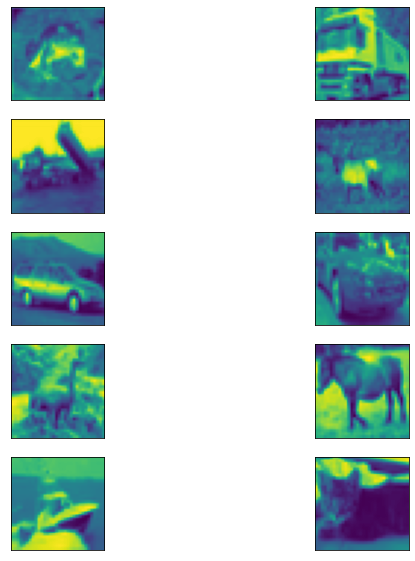

In [ ]:
cant = 10
M,N = 5,2
fig, axs = plt.subplots(M, N,figsize=(10,10))
cont = 0
for i in range(M):
  for j in range(N):
    a = axs[i,j].imshow(x_train[cont]); plt.sca(axs[i,j]); plt.yticks([]); plt.xticks([])
    cont +=1
fig.show()
#plt.savefig('dataset.svg')

In [ ]:


X = np.zeros((*x_test.shape[1:], n_clases, cant_por_clase))
dict_dataset = {}
for clase in range(n_clases):
  pos_clases =  np. where(y_test==clase)[0]
  
  pos_escogidas = np.random.choice(pos_clases, cant_por_clase)

  imagenes = x_test[pos_escogidas]

  X[...,clase, :]= np.transpose(imagenes, axes=[1,2,0]).tolist() 

dict_dataset["X"] = X

In [ ]:
savemat(os.path.join( "Data_4_Lab", dataset+"_datos.mat"), dict_dataset)

In [6]:
mnist_images = tfds.load("mnist", split='test', as_supervised=True, batch_size=512)
fashion_images = tfds.load("fashion_mnist", split='test', as_supervised=True, batch_size=512)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5XQ1VZ/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5XQ1VZ/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


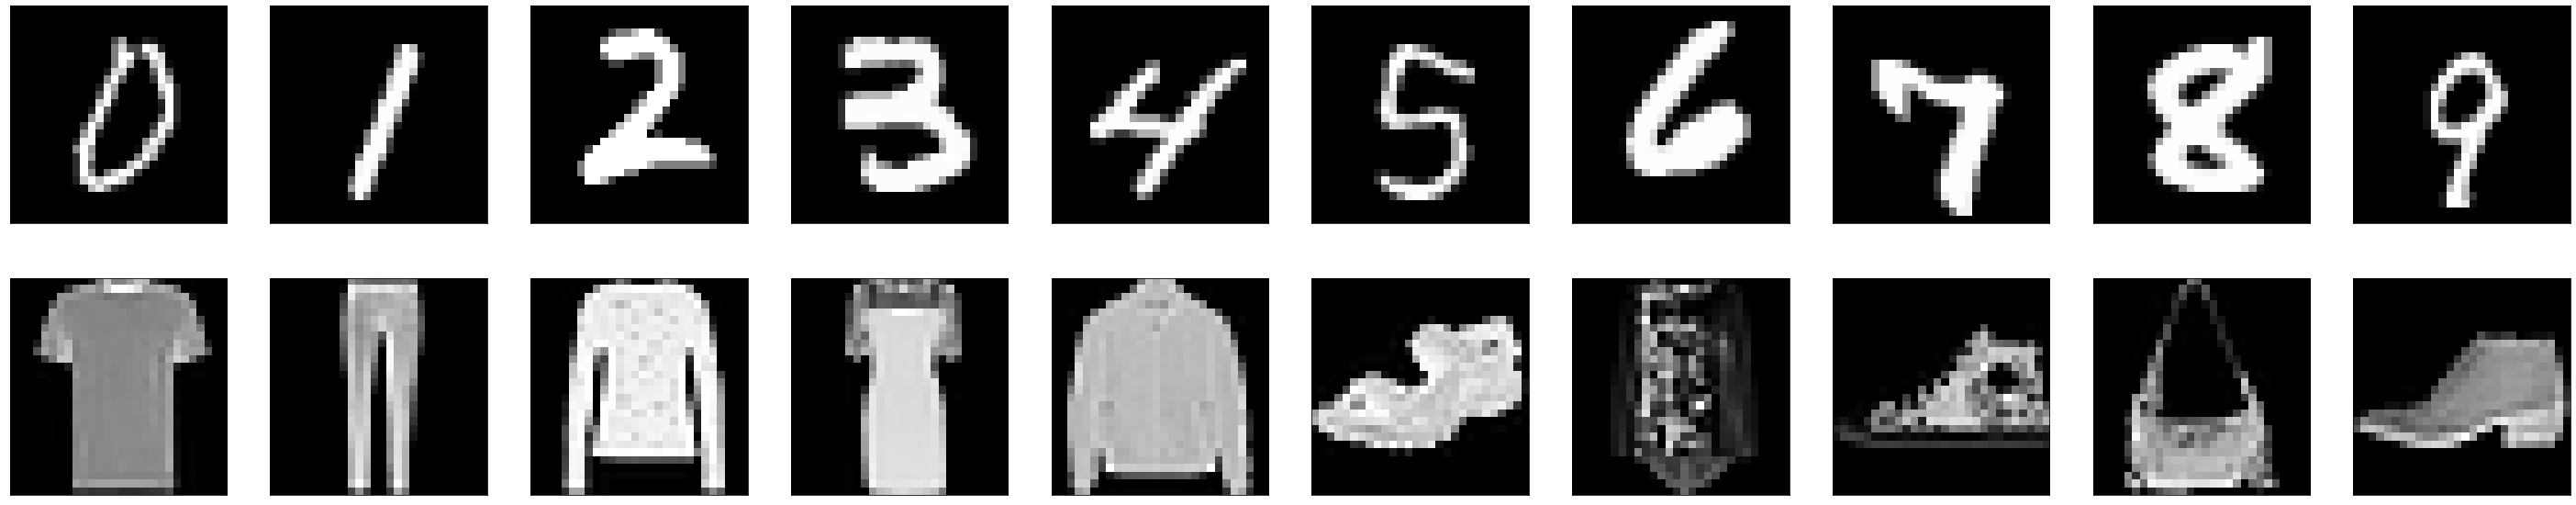

In [16]:
x_test, y_test = next(iter(fashion_images))
x_test, y_test = x_test.numpy(), y_test.numpy()
#print(x_test.shape, y_test.shape, x_test.dtype, y_test.dtype, type(x_test), type(y_test))
M,N = 2,10
fig, axs = plt.subplots(M, N,figsize=(50,10))
for i, dataset in enumerate([mnist_images, fashion_images]):
  x_test, y_test = next(iter(dataset))
  x_test, y_test = x_test.numpy(), y_test.numpy()
  for j in range(10):
    pos_clases =  np. where(y_test==j)[0]
    
    pos_escogidas = np.random.choice(pos_clases, 1)

    image = x_test[pos_escogidas][0,:,:,0]

    axs[i,j].imshow(image, cmap='gray'); plt.sca(axs[i,j]); plt.yticks([]); plt.xticks([])


fig.savefig("datasets.svg")  #X[...,clase, :]= np.transpose(imagenes, axes=[1,2,0]).tolist() 

#dict_dataset["X"] = X
